# Week 2 Assignment

## 1. Simple Octave Function

**warmUpExercise**

Create a 5x5 identity matrix

In [1]:
import numpy as np

A = np.identity(5)
print(A)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## 2 Linear regression with one variable

**Plotting the data**

Plot the data below

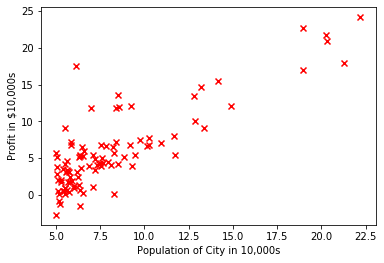

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

data = np.genfromtxt('ex1data1.txt', delimiter=',')
x = data[:,0]
y = data[:,1]
m = len(y)
plt.scatter(x, y, marker='x', color='red')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

**Implementing Gradient Descent**

Here we fit linear regression using a batched gradient descent algorithm

In [73]:
# First add a column of 1s to our features matrix
X = np.matrix([np.ones(m),x])
X = X.transpose()
# convert x & y into matrix not vector...
y = np.matrix(y)
y = y.transpose()
x = np.matrix(x)
x = x.transpose()
# Initialize fitting parameters
theta = np.zeros((2,1))
iterations = 1500
alpha = 0.01

In [78]:
# Cost
hypo = X*theta
cost = (1/(2*m)) * np.sum(np.square(hypo-y))
print(cost)

32.072733877455676


In [97]:
def computeCost(X, y, theta):
    m = len(y)
    # Get hypothesis
    h = X*theta
    
    # calculate sum of squares difference
    diff = np.sum(np.square(hypo - y))
    
    # multiply by m factor
    cost = (1/(2*m)) * diff
    return cost

In [101]:
# Gradient descent
def iterateTheta(X, y, theta, alpha):
    m = len(y)
    
    # Get hypothesis
    h = X*theta
    
    # X.T is transpose of X
    theta = theta - ((1 - m) * (alpha) * (X.T*(hypo-y)))
    
    return theta